In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Salary Data.csv")

# Display first rows
print("Dataset Preview:")
print(df.head())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())




Dataset Preview:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

Missing Values:
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [6]:
# Drop rows with missing values in 'Years of Experience' or 'Salary'
df.dropna(subset=['Years of Experience', 'Salary'], inplace=True)

# Features and Target
X = df[['Years of Experience']]
y = df['Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = LinearRegression()

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)



Model Evaluation:
Mean Squared Error (MSE): 241834883.8999349
R² Score: 0.8991338517367767


In [13]:
# === NEW: Display Actual vs Predicted Salary ===
results = pd.DataFrame({
    'YearsExperience': X_test.values.flatten(),
    'Actual Salary': y_test.values,
    'Predicted Salary': y_pred
})

# Calculate error
results['Error'] = results['Actual Salary'] - results['Predicted Salary']

# Reset index for clean display
results = results.reset_index(drop=True)

print("\n=== Actual vs Predicted Salary (First 10 rows) ===")
print(results.head(10))




=== Actual vs Predicted Salary (First 10 rows) ===
   YearsExperience  Actual Salary  Predicted Salary         Error
0             21.0       180000.0     174795.471295   5204.528705
1             10.0        65000.0      99746.979370 -34746.979370
2             16.0       125000.0     140682.520420 -15682.520420
3              6.0        80000.0      72456.618670   7543.381330
4             17.0       140000.0     147505.110595  -7505.110595
5             18.0       160000.0     154327.700770   5672.299230
6             22.0       160000.0     181618.061470 -21618.061470
7             10.0       120000.0      99746.979370  20253.020630
8              3.0        50000.0      51988.848145  -1988.848145
9              9.0        95000.0      92924.389195   2075.610805


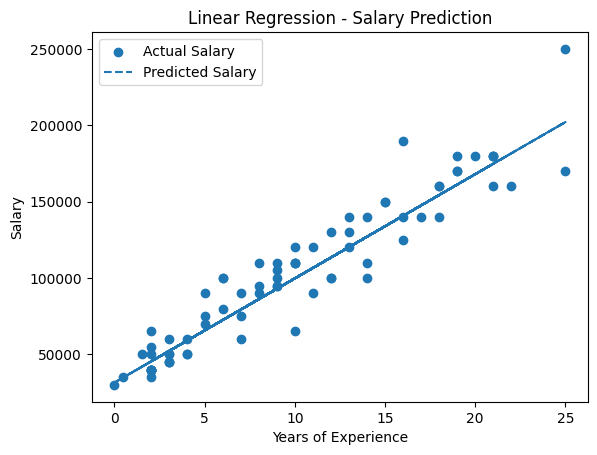

In [9]:
# Plot regression line
plt.scatter(X_test, y_test, label="Actual Salary")
plt.plot(X_test, y_pred, label="Predicted Salary", linestyle='--')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression - Salary Prediction")
plt.legend()
plt.show()
